# Miguel Eduardo Castro Velasco

## Análisis de datos

### Árboles de decisión
### Dataset – Titanic 

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
5. Entrenar el modelo configurando los diferentes
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.
8. Interpretar, analizar y documentar los resuados obtenidosgio.s.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

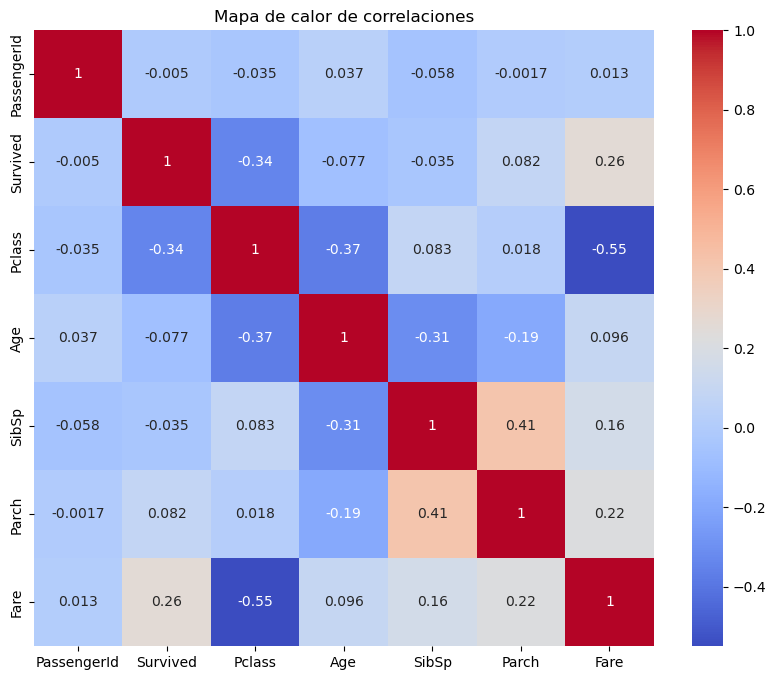

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Matriz de confusión:
[[93 12]
 [24 50]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Precisión del modelo: 0.80


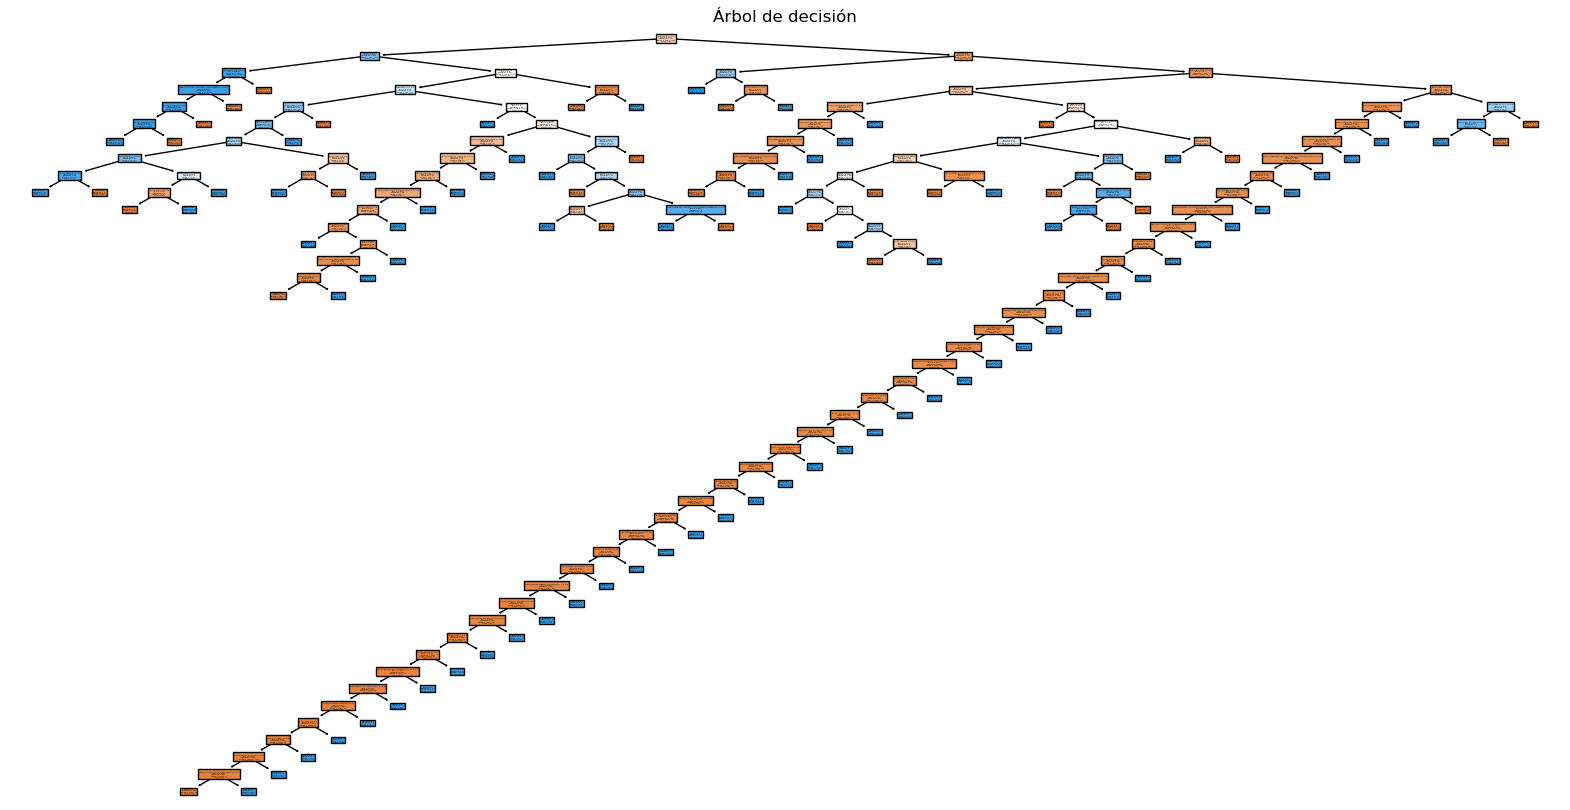

Reglas del árbol de decisión:
|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Cabin_C22 C26 <= 0.50
|   |   |   |--- Name_Yrois, Miss. Henriette ("Mrs Harbeck") <= 0.50
|   |   |   |   |--- Ticket_PC 17595 <= 0.50
|   |   |   |   |   |--- Ticket_11668 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Ticket_11668 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Ticket_PC 17595 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Name_Yrois, Miss. Henriette ("Mrs Harbeck") >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Cabin_C22 C26 >  0.50
|   |   |   |--- class: 0
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Embarked_S <= 0.50
|   |   |   |   |--- Ticket_2665 <= 0.50
|   |   |   |   |   |--- Fare <= 15.37
|   |   |   |   |   |   |--- Fare <= 8.08
|   |   |   |   |   |   |   |--- PassengerId <= 435.50
|   |   |   |   |   |   |   |   |--- Ticket_382649 <= 0.50
|   |   |   |   |   |   |   |   |   |--- clas

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el conjunto de datos
df = pd.read_csv('Titanic-Dataset.csv')  # Cambia el nombre si es necesario

# 2. Análisis exploratorio de datos
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Valores faltantes

# Visualización de correlaciones con columnas numéricas
numeric_columns = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

# 3. Preprocesamiento de datos
# Rellenar valores faltantes (ejemplo: media para numéricos, moda para categóricos)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# 4. Selección de características
# Suponiendo que la columna objetivo es "Survived", ajusta si es diferente
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenamiento del modelo
# Configuración de hiperparámetros usando GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# 6. Evaluación del modelo
y_pred = best_model.predict(X_test)

# Métricas
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")

# 7. Visualización del árbol
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Árbol de decisión')
plt.show()

# 8. Interpretación y análisis
# Exportar texto del árbol de decisión
tree_rules = export_text(best_model, feature_names=list(X.columns))
print("Reglas del árbol de decisión:")
print(tree_rules)
